# Part I

##### Authors: Yimin You

## Introduction


// NOTE: write about project//

The dataset is collected from UCI Machine Learning Repository and the extraction was done by Barry Becker from the 1994 Census database.
The group will consider two response variables in the population. One of the parameters is the age of our samples, which we will treat as a continuous variable, and the other is the income, which in our dataset, is a factor with two levels: less than 50k, or more than 50k. We will then conduct both simple random sampling and stratified sampling method on continuous variable to estimate the mean age and binary variables to estimate the proportion of people with an income over 50k a year.


## Parameters of Interest, Sample Size
// write about parameters of interest

Once we load the data into R, we can see that our population size is ${N}$ = 32561. From here, we can decide on a sample size. 

n = 2236


|     | Value  |   
| :----------: | :----------: | 
| Age Population Mean ($\bar y_{pop}$)|38.5816
| Income Population Proportion ($p$)|0.2408


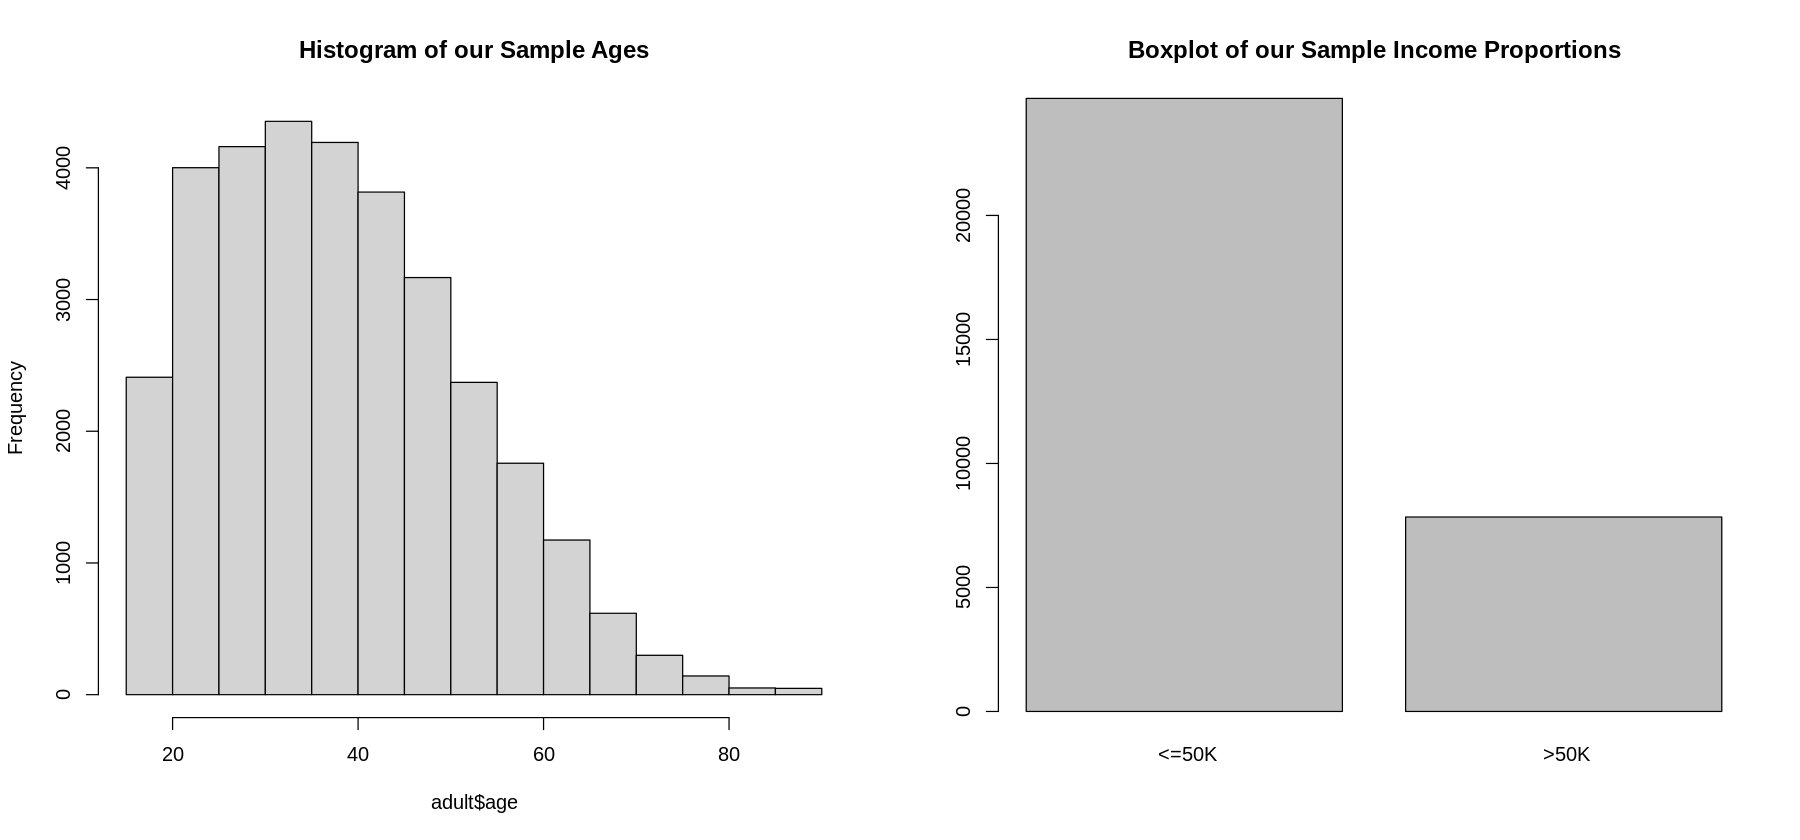

In [10]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
hist(adult$age, main = "Histogram of our Sample Ages")
barplot(table(adult$income), main = "Boxplot of our Sample Income Proportions")

The histogram for continuous variable age is right-skewed with the majority of the population ages being between 20 years old and 50 years old with a mean of around 30 years old. We take note that there are few samples with ages on the higher end. From the barplot, it looks like more than three quarters of the population are making less than 50K a year, with approximately one quarter of the population making more than 50K a year.

## Analysis and Comparison

### Simple Random Sampling

A simple random sample maximizes the randomness of the data we obtain, meaning we have very little control as to how the data will be distributed. Intuitively, this may suggest that the sample we collect will be representative of the population. However, there is a remote chance that the sample we collect may not be fully representative of our dataset. At this point, we will have to assume that our sample will be fully representative, and that our members in our sample all had an equal chance of being selected to be in our sample.

In order to randomly generate an independent and identical sample, we use sample.int() function to draw 2236 indices from 32561 total indices. 

#### Binary Population
Recall that our response variable is the proportion of people that have an income greater that 50K. Sampling from our population, we obtain the sampled mean, 0.2405, with a standard error of [insert equation] 0.0093. The 95% confidence interval is [insert equation], which is [0.2224, 0.2596].
Through our simple random sample as well as utilizing the Central Limit Theorem, our high sample size yields a normal sampling distribution with a mean of 0.2405. From this, we are 95% confident that the true proportion of people with an income greater than 50K is between 0.2224 and 0.2596. 

|     | Value  |   
| :----------: | :----------: | 
| Sample Proportion|0.2415
| Sample SE|0.0087
| Lower CI|0.2244
| Upper CI|0.2586

#### Continous Population
We use the sample mean $\bar{y_s} = \frac{\sum_{i = 1}^{n}{y_i}}{n}$ to estimate the population mean age for continuous parameter. Using the sample standard deviation, we are able to calculate the standard error using $SE_{\bar{y_s}} = \sqrt{(1-\frac{n}{N}) \frac{{s_s}^2}{n}}$. The 95% confidence interval is measured by ${\bar{y_s}}~ \pm 1.96 \times SE_{\bar{y_s}}$

|     | Value  |   
| :----------: | :----------: | 
| Sample Mean|38.6556
| Sample SE|0.2847
| Lower CI|38.0975
| Upper CI|39.2137

According to the output, the sample mean is 38.6556 with a standard error of 0.2847. As the sample size is large enough, we can utilize the central limit theorem and conclude that the sampling distribution of the mean will be normal. From this, we can be 95% confident that the true population mean is between 38.0975 and 39.2137.

### Stratified Sampling

For stratified sampling method, we first use information about the population to divide the population of interest into sub-populations. Then we random sample $n_h$ number of individuals from each subpopulation where $n_h$ is obtained through proportional allocation. In theory, stratified sampling will more accurately reflect the population studied based on a set of chosen characteristics.

* Assumptions: 

> We assume the sampling cost for each subpopulation is the same. 

> We assume the subpopulations have similar variance. 

* Procedures:

> First, $n_h$ for each subpopulation is calculated based on subpopulation size such that $n_h = n\frac{N_h}{N}$, where $n$ is the total sample size, $N_h$ is the subpopulation size, and $N$ is the population size. 

> Second, we divide the population into $h$ subpopulation and randomly sample $n_h$ individuals without replacement from each subpopulation to form of stratified sample. 

> Finally, we find the mean and variance of age and proportion of individuals with income greater than 50K for each subpopulation and combine the estimates to form one stratified estimates $\bar y_{str,s}$,$p_{str,s}$ of the population parameters. 

#### Binary Population


|     | Value  |   
| :----------: | :----------: | 
| Sample Mean|0.24064
| Sample SE|0.00867
| Lower CI|0.22364
| Upper CI|0.25764

#### Continous Population

|     | Value  |   
| :----------: | :----------: | 
| Sample Proportion|38.6169
| Sample SE|0.2285
| Lower CI|38.169
| Upper CI|39.065

## Appendix

In [38]:
library(tidyverse)
library(GGally)
adult <- read.csv("adult.data", header = FALSE)
column_names <- c("age",
                  "workclass",
                  "final_weight",
                  "education", 
                  "education_num",
                  "marital_status",
                  "occupation",
                  "relationship",
                  "race",
                  "sex",
                  "capital_gain", 
                  "capital_loss", 
                  "hours_per_week", 
                  "native_country",
                  "income")
adult <- setNames(adult, column_names)
adult <- adult %>% mutate_if(is.character, as.factor)

n = 2236 
N = nrow(adult) ## population size

## Stratified Sampling

### Continuous Parameter Estimation

In [2]:
level <- as.character(levels(as.factor(adult$marital_status)))
status <- as.character(adult$marital_status)
for (i in 1:length(status)) {
    ifelse (status[i] == level[2] | status[i] == level[3] | status[i] == level[4], 
            status[i] <- " Married", 
            status[i] <- status[i])
}

In [3]:
## Get pproportional stratum sizes
adult$status <- as.factor(status)

str_continuous <- adult %>%
    group_by(status) %>%
    summarise(N_h = n(), stratum_prop = N_h/N) %>%
    mutate(n_h = round(stratum_prop*n))
str_continuous

status,N_h,stratum_prop,n_h
<fct>,<int>,<dbl>,<dbl>
Divorced,4443,0.13645158,305
Married,15417,0.47348054,1059
Never-married,10683,0.32809189,734
Separated,1025,0.03147938,70
Widowed,993,0.03049661,68


since nn for Married-AF-spouse, Married-civ-spouse and Married-spouse-absent are too small, so we combine them into Married status.



In [4]:
## Stratified Samples
marital_levels <- levels(adult$status)
nh <- str_continuous$n_h

Divorced_sample <- adult %>%
    filter(status == marital_levels[1]) %>%
    pull(age) %>%
    sample(nh[1])

Married_sample <- adult %>%
    filter(status == marital_levels[2]) %>%
    pull(age) %>%
    sample(nh[2])

NeverMarried_sample <- adult %>%
    filter(status == marital_levels[3]) %>%
    pull(age) %>%
    sample(nh[3])

Separated_sample <- adult %>%
    filter(status == marital_levels[4]) %>%
    pull(age) %>%
    sample(nh[4])

Widowed_sample <- adult %>%
    filter(status == marital_levels[5]) %>%
    pull(age) %>%
    sample(nh[5])

* ##### Formula<br>
The estimate for the mean age is $\bar{y}_{str} = \sum_{h=1}^{H} ((\frac{N_{h}}{N})\bar{y}_{h}) $, when $N_{h}$ is the size of the $h^{th}$ strata, $N$ is the population size, and $\bar{y}_{h}$ is the mean age of $h^{th}$ strata. the standard error for this estimate is $SE_{\bar{y}_{str}} =  \sqrt{\sum_{h=1}^{H}((\frac{N_{h}}{N})^2SE_{\bar{y}_h}}$, where $SE_{\bar{y}_h} = \sqrt{(1-\frac{n}{N})*\frac{S^2_{h}}{n}}$ with $S_{h}$ being the standard deviation of the $h^{th}$ strata. The 95% confidence interval for $\bar{y}_{str}$ is $\bar{y}_{s}\pm 1.96*SE_{\bar{y}_{str}}$

In [6]:
## Estmitate mean age
stratum_prop <- str_continuous$stratum_prop
Divorced_est <- (stratum_prop[1])*mean(Divorced_sample)
Married_est <- (stratum_prop[2])*mean(Married_sample)
NeverMarried_est <- (stratum_prop[3])*mean(NeverMarried_sample)
Separated_est <- (stratum_prop[4])*mean(Separated_sample)
Widowed_est <- (stratum_prop[5])*mean(Widowed_sample)

hat_ybar_str <- sum(c(Divorced_est,Married_est,NeverMarried_est,Separated_est,Widowed_est))

## estimate SE
Divorced_var <- var(Divorced_sample)

Married_var <- var(Married_sample)

NeverMarried_var <- var(NeverMarried_sample)

Separated_var <- var(Separated_sample)

Widowed_var <- var(Widowed_sample)

vars <- c(Divorced_var,Married_var,NeverMarried_var,Separated_var,Widowed_var)

N_h <- str_continuous$N_h
Divorced_var <- ((stratum_prop[1])^2) * (1-(nh[1]/N_h[1]))*(vars[1]/nh[1])
Married_var <- ((stratum_prop[2])^2) * (1-(nh[2]/N_h[2]))*(vars[2]/nh[2])
NeverMarried_var <- ((stratum_prop[3])^2) * (1-(nh[3]/N_h[3]))*(vars[3]/nh[3])
Separated_var <- ((stratum_prop[4])^2) * (1-(nh[4]/N_h[4]))*(vars[4]/nh[4])
Widowed_var <- ((stratum_prop[5])^2) * (1-(nh[5]/N_h[5]))*(vars[5]/nh[5])

yhatse <- sqrt(sum(c(Divorced_var,Married_var,NeverMarried_var,Separated_var,Widowed_var)))

result_data <- data.frame(Estimate = hat_ybar_str, SE = yhatse, true_parameter = mean(adult$age))
result_data

Estimate,SE,true_parameter
<dbl>,<dbl>,<dbl>
38.61688,0.2285194,38.58165


In [8]:
phat.str.me <-1.96*yhatse
phat.str.confint <-c(hat_ybar_str-phat.str.me,hat_ybar_str+phat.str.me)
str.matrix <-matrix(c("SampleMean.","SE","LowerBound95%CI",
"Upper Bound95%CI",
round(hat_ybar_str,3), round(yhatse,3),
round(phat.str.confint[1],3),
round(phat.str.confint[2],3)), nrow=4)
knitr::kable(x =str.matrix,col.names=c("","Value"))



|                 |Value  |
|:----------------|:------|
|SampleMean.      |38.617 |
|SE               |0.229  |
|LowerBound95%CI  |38.169 |
|Upper Bound95%CI |39.065 |

* ###### RESULT<br>
From our result, the estimate for mean age is 39.359. The standard error for this estimate is 0.03912924, Since our sample size sufficiently large (bigger than 25), by the central limit theorem, the distribution of our sample mean will be approximately normally distributed among many sample means. Therefore, we can conclude that we are 95% confident that the true mean age is between 39.282 and 39.436.

### Binary Parameter Estimation

In [39]:
level <- as.character(levels(as.factor(adult$race)))
races <- as.character(adult$race)
for (i in 1:length(races)) {
    if (races[i] == level[1] | races[i] == level[4]) {
        races[i] <- " Other"
        }
}
adult$race <- as.factor(races)

level <- as.character(levels(as.factor(adult$race)))
level

[1] " Asian-Pac-Islander" " Black"              " Other"             
[4] " White"

In [40]:
stratum_n <-adult %>% 
    group_by(race) %>% 
    summarise(stratum_size = n()) %>%
    pull(stratum_size)
stratum_n

[1]  1039  3124   582 27816

In [45]:
income_n_by_stratum <- adult %>% 
    group_by(income, race) %>% 
    summarise(num_greater_than_50K = n(),
              .groups = "drop")
stratum_size <- c(rep(stratum_n,2)) 
income_n_by_stratum$stratum_size <- stratum_size
income_stratify_data <- income_n_by_stratum %>% 
            mutate(p = num_greater_than_50K/stratum_size,
                   allocation_prop = stratum_size/N,
                   n_h = round(n*allocation_prop)) %>%
            slice(5:8)
income_stratify_data

income,race,num_greater_than_50K,stratum_size,p,allocation_prop,n_h
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
>50K,Asian-Pac-Islander,276,1039,0.2656400,0.03190934,71
>50K,Black,387,3124,0.1238796,0.09594300,215
>50K,Other,61,582,0.1048110,0.01787414,40
>50K,White,7117,27816,0.2558599,0.85427352,1910


In [46]:
binary_stratify_data <- adult %>% select(race, income)
level <- levels(as.factor(binary_stratify_data$race))
Asian <- binary_stratify_data %>% filter(race == level[1]) %>% pull(income)
Black <- binary_stratify_data %>% filter(race == level[2]) %>% pull(income)
Other <- binary_stratify_data %>% filter(race == level[3]) %>% pull(income)
White <- binary_stratify_data %>% filter(race == level[4]) %>% pull(income)

In [49]:
set.seed(123456)
n_h <- income_stratify_data$n_h
asian_sample <- sample(as.character(Asian), n_h[1])
black_sample <- sample(as.character(Black), n_h[2])
other_sample <- sample(as.character(Other), n_h[3])
white_sample <- sample(as.character(White), n_h[4])


In [50]:
asian_prop <- mean(asian_sample == " >50K")
black_prop <- mean(black_sample == " >50K")
other_prop <- mean(other_sample == " >50K")
white_prop <- mean(white_sample == " >50K")
props <- c(asian_prop, black_prop, other_prop, white_prop)
subpopulation_prop <- income_stratify_data$allocation_prop
prop_est <- sum(props*subpopulation_prop)
prop_est

[1] 0.2406401

In [52]:
N_h <- income_stratify_data$stratum_size
FPC = 1 - n_h/N_h
asian_var = FPC[1]*asian_prop*(1-asian_prop)/n_h[1]
black_var = FPC[2]*black_prop*(1-black_prop)/n_h[2]
other_var = FPC[3]*other_prop*(1-other_prop)/n_h[3]
white_var = FPC[4]*white_prop*(1-white_prop)/n_h[4]
prop_var = c(asian_var, black_var, other_var, white_var)
pooled_se = sqrt(sum(prop_var*(subpopulation_prop)^2))
pooled_se

[1] 0.008671406

In [53]:
data.frame(name = c("Proportion Estimate", "Proportion SE", "Lower Bound", "Upper Bound"),
           value = c(prop_est,round(pooled_se,5),prop_est - 1.96*pooled_se,prop_est + 1.96*pooled_se))

name,value
<chr>,<dbl>
Proportion Estimate,0.2406401
Proportion SE,0.0086700
Lower Bound,0.2236442
Upper Bound,0.2576361


## Discussion 

## Conclusion 

# Part II